# Proyect Statistics
### Fatima Miranda
### Damaris
### Brianna
### Christian Castro
### Javi
### Luis Fernando Monterrubio Cota



In [37]:
import requests
import numpy
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
player = players.get_players()
bron =[player for player in player if player['full_name']=='LeBron James'][0]
ty =[player for player in player if player['full_name']=='Tyronn Lue'][0]
bron

{'id': 2544,
 'full_name': 'LeBron James',
 'first_name': 'LeBron',
 'last_name': 'James',
 'is_active': True}

In [39]:
career = playercareerstats.PlayerCareerStats(player_id='2544') 
lebron = career.get_data_frames()[0]
career_2 = playercareerstats.PlayerCareerStats(player_id='1731') 
tyron = career_2.get_data_frames()[0]

lebron['MIN'] = lebron['MIN'].astype('int64')
tyron['MIN'] = tyron['MIN'].astype('int64')

tyron[['TEAM_ABBREVIATION','PLAYER_AGE','MIN','REB','AST','TOV']]
lebron[['TEAM_ABBREVIATION','PLAYER_AGE','MIN','PTS','REB','AST','TOV']]

,TEAM_ABBREVIATION,PLAYER_AGE,MIN,PTS,REB,AST,TOV
0,CLE,19.0,3120,1654,432,465,273
1,CLE,20.0,3388,2175,588,577,262
2,CLE,21.0,3361,2478,556,521,260
3,CLE,22.0,3190,2132,526,470,250
4,CLE,23.0,3027,2250,592,539,255
5,CLE,24.0,3054,2304,613,587,241
6,CLE,25.0,2966,2258,554,651,261
7,MIA,26.0,3063,2111,590,554,284
8,MIA,27.0,2326,1683,492,387,213
9,MIA,28.0,2877,2036,610,551,226


In [40]:
lebron.isna().sum()

PLAYER_ID            0
SEASON_ID            0
LEAGUE_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
PLAYER_AGE           0
GP                   0
GS                   0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
dtype: int64

In [41]:
lebron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_ID          20 non-null     int64  
 1   SEASON_ID          20 non-null     object 
 2   LEAGUE_ID          20 non-null     object 
 3   TEAM_ID            20 non-null     int64  
 4   TEAM_ABBREVIATION  20 non-null     object 
 5   PLAYER_AGE         20 non-null     float64
 6   GP                 20 non-null     int64  
 7   GS                 20 non-null     int64  
 8   MIN                20 non-null     int64  
 9   FGM                20 non-null     int64  
 10  FGA                20 non-null     int64  
 11  FG_PCT             20 non-null     float64
 12  FG3M               20 non-null     int64  
 13  FG3A               20 non-null     int64  
 14  FG3_PCT            20 non-null     float64
 15  FTM                20 non-null     int64  
 16  FTA                20 non-nu

In [42]:
lebron.corr(method='pearson')

C:\Users\luisf\AppData\Local\Temp\ipykernel_20100\1562253608.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lebron.corr(method='pearson')


,PLAYER_ID,TEAM_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
PLAYER_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEAM_ID,NaN,1.000000,0.541960,-0.511431,-0.509252,-0.558833,-0.468948,-0.593977,0.394921,-0.208739,...,-0.063702,-0.481642,-0.320794,-0.374311,-0.445762,-0.499306,-0.567167,-0.492350,-0.588772,-0.493571
PLAYER_AGE,NaN,0.541960,1.000000,-0.651732,-0.649528,-0.769178,-0.571259,-0.722161,0.423202,0.103718,...,-0.506900,-0.615688,-0.306601,-0.391199,-0.299522,-0.843165,-0.571831,-0.418894,-0.689944,-0.621320
GP,NaN,-0.511431,-0.651732,1.000000,0.999915,0.976537,0.954008,0.951683,0.154021,0.496299,...,0.531156,0.769745,0.864701,0.895160,0.833475,0.879553,0.691393,0.915087,0.880079,0.941360
GS,NaN,-0.509252,-0.649528,0.999915,1.000000,0.975840,0.953023,0.950137,0.155890,0.496345,...,0.533065,0.764877,0.864897,0.894277,0.833634,0.877882,0.687855,0.915348,0.877822,0.939969
MIN,NaN,-0.558833,-0.769178,0.976537,0.975840,1.000000,0.946788,0.974439,0.044673,0.424841,...,0.541069,0.777450,0.807433,0.848510,0.759343,0.926312,0.705607,0.858183,0.912364,0.946207
FGM,NaN,-0.468948,-0.571259,0.954008,0.953023,0.946788,1.000000,0.958174,0.281311,0.608706,...,0.512558,0.754259,0.921738,0.939940,0.819147,0.837186,0.728801,0.867376,0.868805,0.990305
FGA,NaN,-0.593977,-0.722161,0.951683,0.950137,0.974439,0.958174,1.000000,-0.000485,0.534036,...,0.505391,0.754629,0.816023,0.850843,0.769631,0.880941,0.764663,0.837211,0.935789,0.963474
FG_PCT,NaN,0.394921,0.423202,0.154021,0.155890,0.044673,0.281311,-0.000485,1.000000,0.356492,...,0.104943,0.096136,0.484811,0.429667,0.270226,-0.026006,-0.035219,0.228274,-0.100977,0.227110
FG3M,NaN,-0.208739,0.103718,0.496299,0.496345,0.424841,0.608706,0.534036,0.356492,1.000000,...,0.131817,0.173644,0.683413,0.613888,0.674950,0.244177,0.450534,0.576952,0.439095,0.598954


C:\Users\luisf\AppData\Local\Temp\ipykernel_20100\2773576935.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lebron.corr())


<AxesSubplot: >

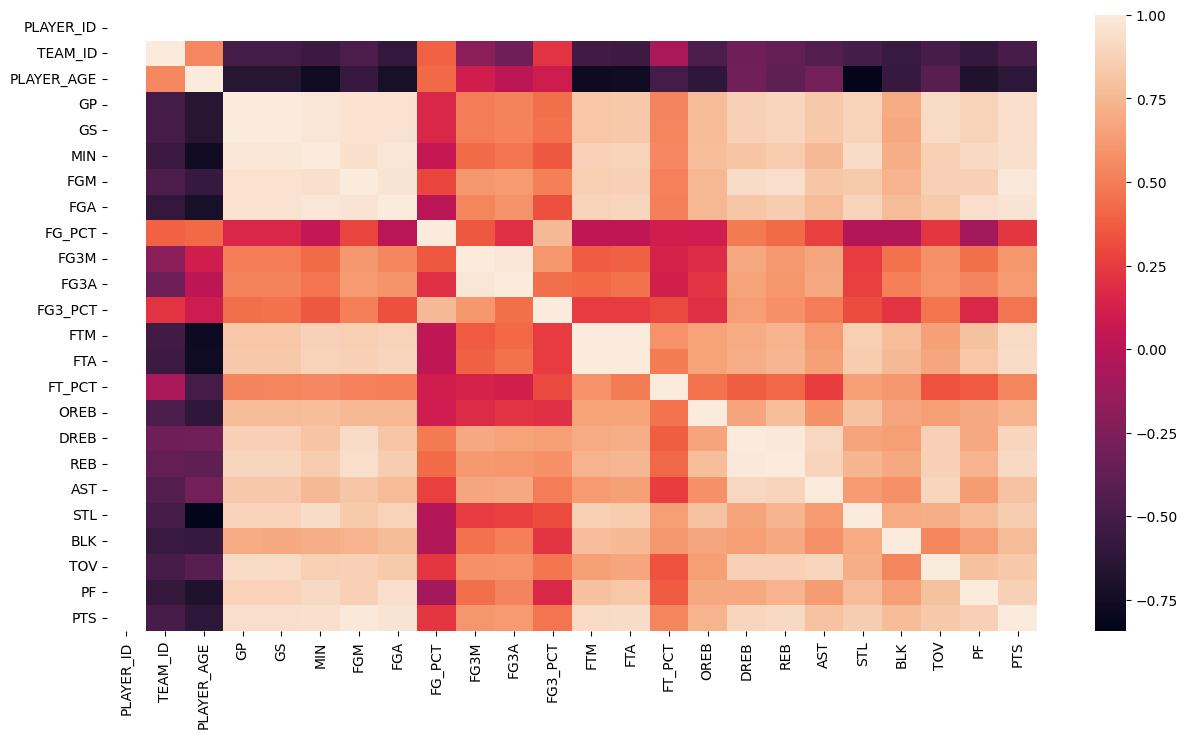

In [43]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(lebron.corr())

In [44]:
x = lebron[['PTS','AST','REB','TOV']]
y = lebron['MIN']

model = linear_model.LinearRegression()
model.fit(x,y)
r2 = model.score(x,y)

print(f'r2 = {r2:.2f}')
print('Coefficients: \n', model.coef_)
predicted = model.predict([[2100, 400, 300,200]])
print(predicted/80)

r2 = 0.93
Coefficients: 
 [ 1.29172279 -0.97582961 -0.9064662   5.03280653]
[37.73363545]


c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
x = tyron[['PTS','TOV']]
y = tyron['MIN']

model = linear_model.LinearRegression()
model.fit(x,y)
r2 = model.score(x,y)

print(f'r2 = {r2:.2f}')
print('Coefficients: \n', model.coef_)

r2 = 0.97
Coefficients: 
 [1.91191734 4.7110945 ]
